In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
admission_df = pd.read_csv('Admission_Predict.csv')

In [ ]:
admission_df.drop('Serial No.',axis=1,inplace = True)

In [ ]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
admission_df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad2eda43c8>,
      dtype=object)

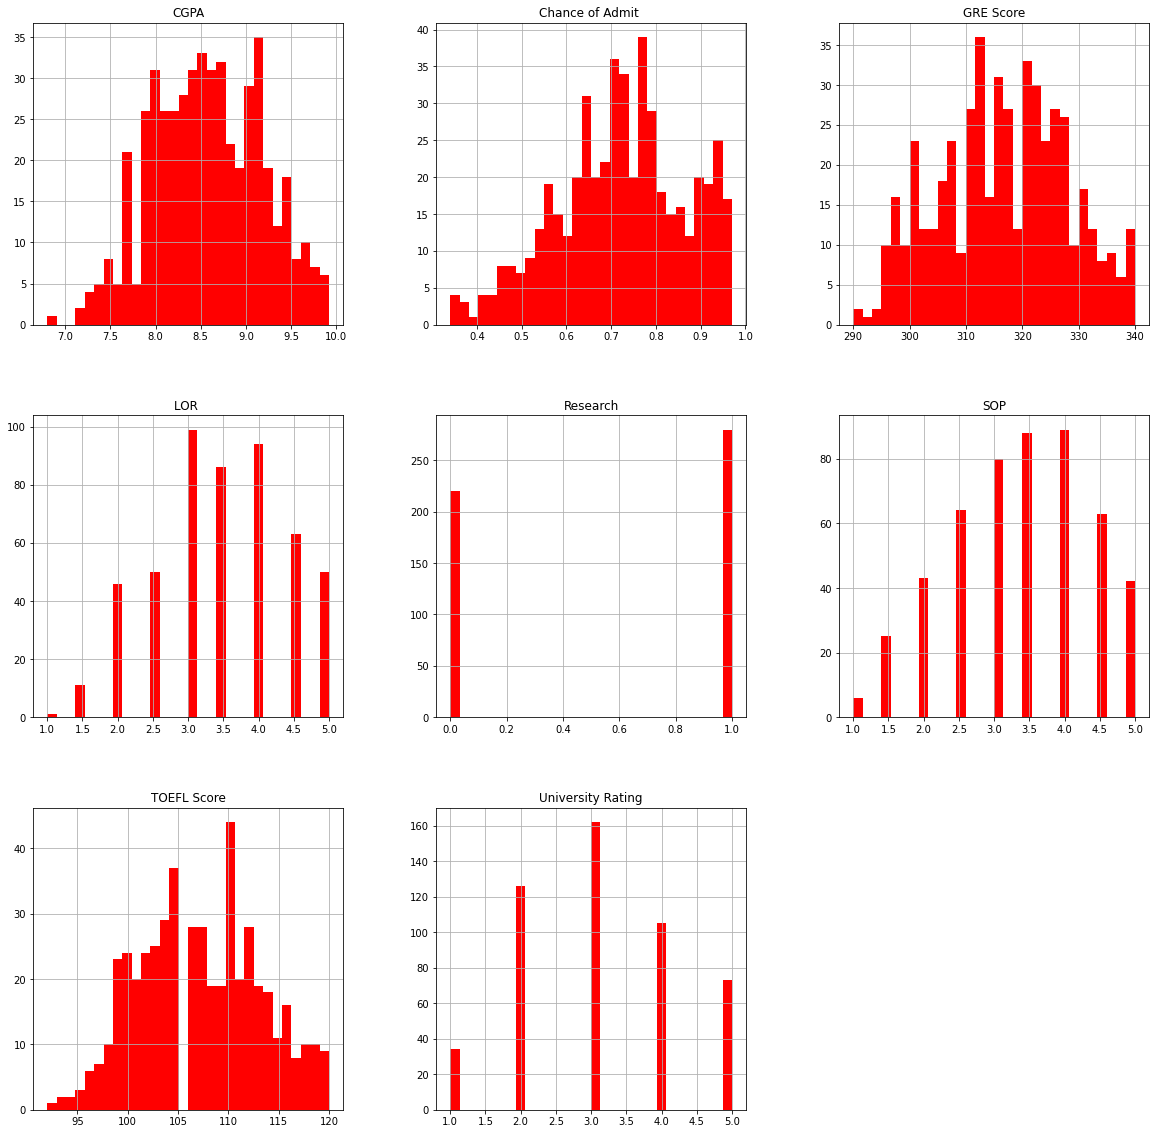

In [ ]:
admission_df.hist(bins=30,figsize=(20,20),color = 'r')

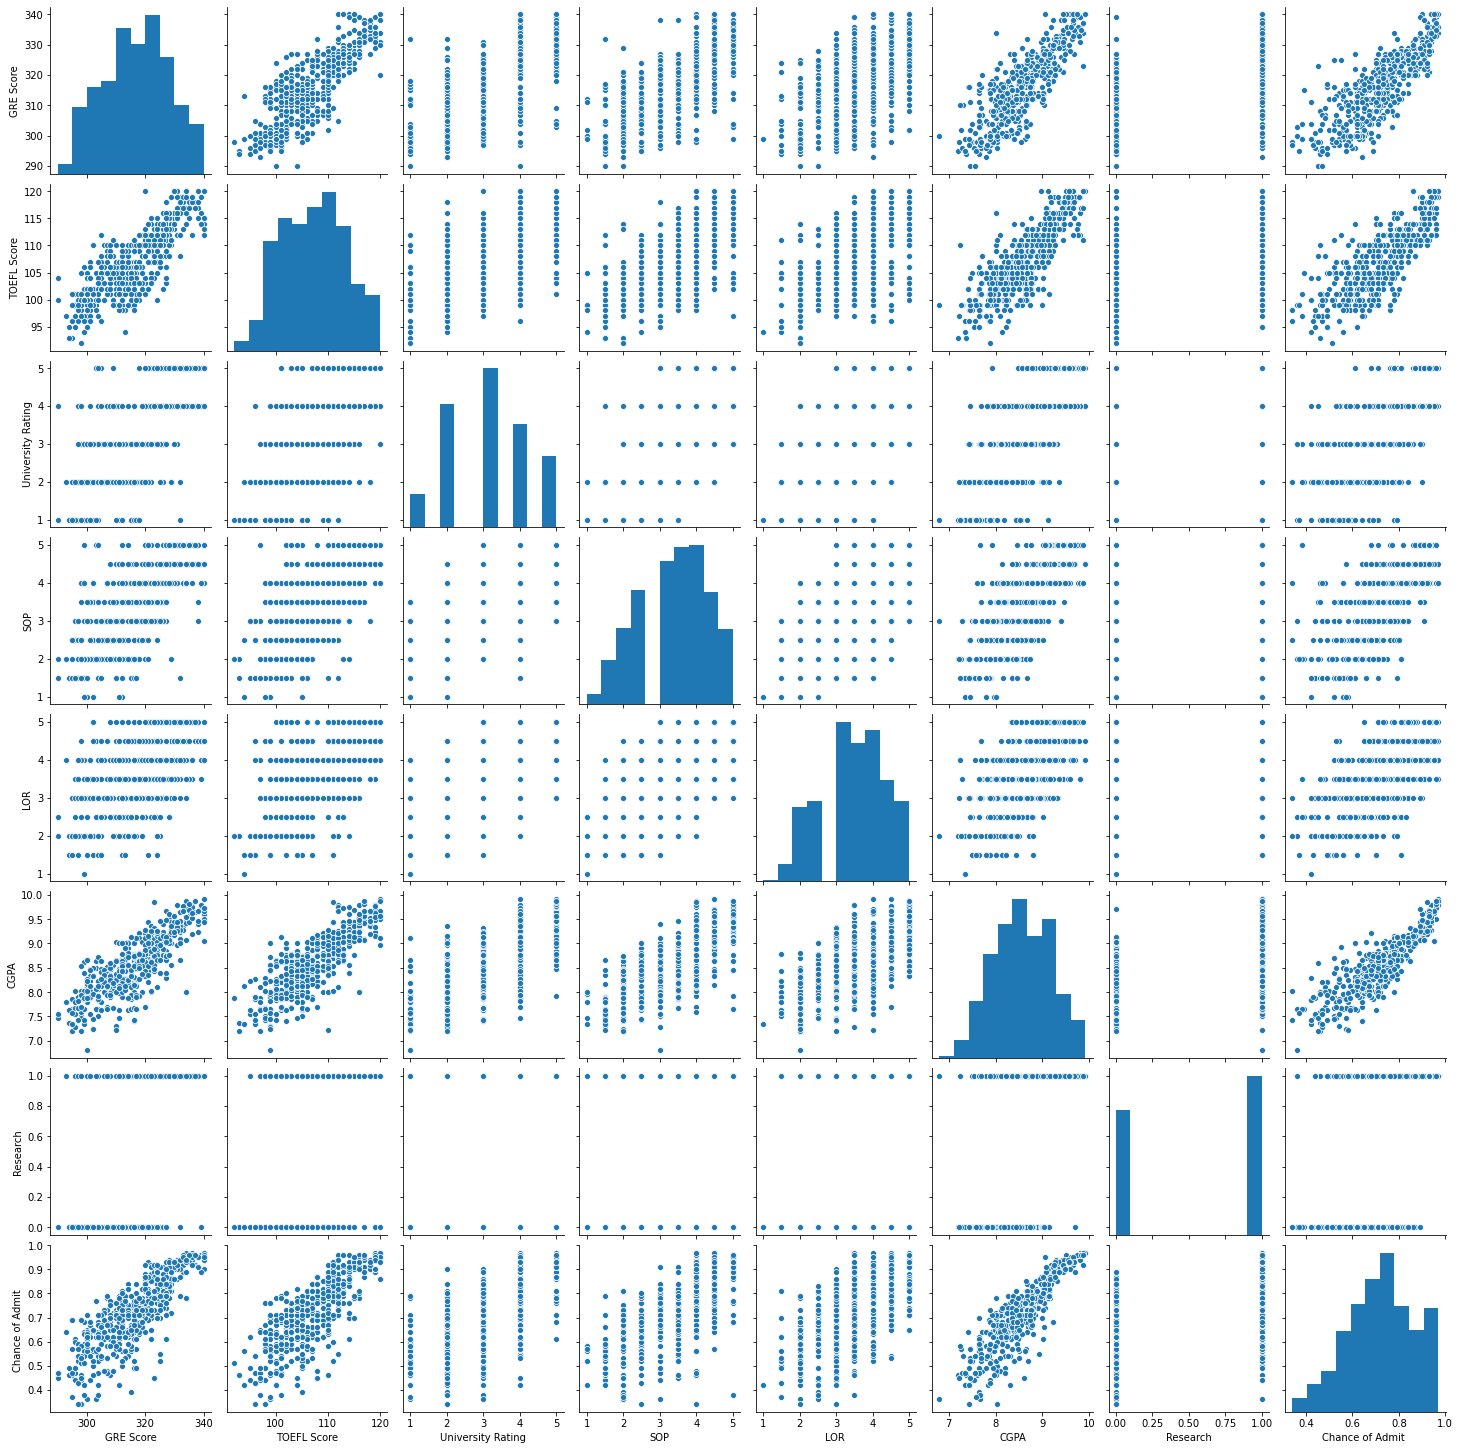

In [ ]:
sns.pairplot(admission_df)

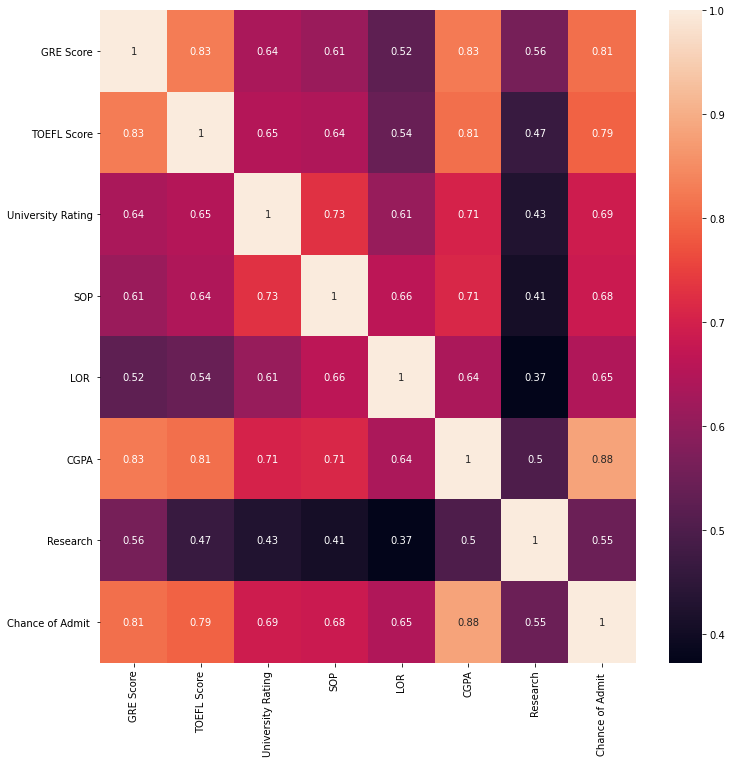

In [ ]:
 corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot =True)
plt.show()

In [ ]:
X = admission_df.iloc[:,:-1].values

In [ ]:
y = admission_df.iloc[:,-1].values

In [ ]:
np.shape(X)

(500, 7)

In [ ]:
X= np.array(X)
y= np.array(y)

In [ ]:
y = y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.02,random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Simple Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
accuracy_LinReg = regressor.score(X_test,y_test)
accuracy_LinReg

0.8632168320140496

In [ ]:
# Support Vector Regression
from sklearn.svm import SVR
svr = SVR(kernel ='rbf')
svr.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
accuracy_SVR = svr.score(X_test,y_test)
accuracy_SVR

0.702837524134441

In [ ]:
# Descion Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
accuracy_dtr = dtr.score(X_test,y_test)
accuracy_dtr

0.9265043638033993

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators =10)
rfr.fit(X_train,y_train)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
accuracy_rfr = rfr.score(X_test,y_test)
accuracy_rfr

0.8404340836012861

In [ ]:

# Artifical Neural Network
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units= 7,activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units= 14,activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units= 7,activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer='adam',loss='mse')

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.4166
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0708
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 11/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0182
Epoch 12/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 13/100
16/16 [=================

In [ ]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)


In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.64 0.64]
 [0.61 0.85]
 [0.62 0.8 ]
 [0.64 0.91]
 [0.58 0.68]
 [0.62 0.54]
 [0.55 0.54]
 [0.55 0.65]
 [0.56 0.52]
 [0.65 0.79]]
